## Make Plots from Climatologies Produced with ObsFlow
### Getting an overview of the catalogue and the various files 

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import xscen as xs
import cartopy.crs as ccrs
import cartopy
from xscen.config import CONFIG
from xclim.core import units
from pathlib import Path

%matplotlib inline
out_dir = '/scen3/braun/data/obs_synthese23/image'
# get the ObsFlow config and project catalog
xs.load_config('/home/braun/python/obsflow/paths_obs.yml', '/home/braun/python/obsflow/config_obs.yml', verbose=(__name__ == "__main__"), reset=True)
pcat = xs.ProjectCatalog('/scen3/braun/data/obs_synthese23/pcat_obs.json')
display(pcat.df)
ds_dict = pcat.search(processing_level='climatology').to_dataset_dict(**CONFIG['to_dataset_dict'])
# remove AHCCD for now
ds_dict = {k: v for k, v in sorted(ds_dict.items()) if 'AHCCD' not in k}

for ds_id, ds_in in ds_dict.items():
    # inspect the dataset
    # print(f'{ds_id}: {ds_in.period.values}')
    # print(f'{ds_id}: {list(ds_in.data_vars.keys())}')
    print(f'{ds_id}: {list(ds_in.dims.keys())}')
    
print('\n\n')

for ds_id, ds_clim in ds_dict.items():
    if 'GovCan_RDRS' in ds_id:
        print(f'{ds_id}:')
        display(ds_dict[ds_id])

INFO:xscen.config:Updated the config with /home/braun/python/obsflow/paths_obs.yml.
INFO:xscen.config:Updated the config with /home/braun/python/obsflow/config_obs.yml.


,id,type,processing_level,bias_adjust_institution,bias_adjust_project,mip_era,activity,driving_institution,driving_model,institution,...,member,xrfreq,frequency,variable,domain,date_start,date_end,version,format,path
0,ECMWF_ERA5-Land_NAM,reconstruction,extracted,NaN,NaN,NaN,NaN,NaN,NaN,ECMWF,...,NaN,D,day,"(tasmin, pr, tas, tasmax)",Quebec,1950-01-01,2022-09-30 00:00:00,NaN,zarr,/scen3/braun/data/obs_synthese23/extracted/ECM...
1,GovCan_RDRS_NAM,reconstruction,extracted,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,D,day,"(tasmin, pr, tas, tasmax)",Quebec,1980-01-01,2018-12-31 00:00:00,v21,zarr,/scen3/braun/data/obs_synthese23/extracted/Gov...
2,GovCan_AHCCD_CAN,station-obs,extracted,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,D,day,"(tasmin, tas, tasmax)",Quebec,1840-03-01,2021-12-31 00:00:00,gen3,zarr,/scen3/braun/data/obs_synthese23/extracted/Gov...
3,GovCan_RDRS_NAM,reconstruction,climatology,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,fx,fx,"(tasmax_std_ann, tasmin_mean_sea, tasmin_mean_...",Quebec,1980-01-01,2018-12-31 00:00:00,v21,zarr,/scen3/braun/data/obs_synthese23/climatology/G...
4,ECMWF_ERA5-Land_NAM,reconstruction,climatology,NaN,NaN,NaN,NaN,NaN,NaN,ECMWF,...,NaN,fx,fx,"(tasmax_std_ann, tasmin_mean_sea, tasmin_mean_...",Quebec,1950-01-01,2022-09-30 00:00:00,NaN,zarr,/scen3/braun/data/obs_synthese23/climatology/E...
5,GovCan_AHCCD_CAN,station-obs,climatology,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,fx,fx,"(tasmin_mean_sea, tasmin_mean_mon, tas_std_sea...",Quebec,1840-03-01,2021-12-31 00:00:00,gen3,zarr,/scen3/braun/data/obs_synthese23/climatology/G...
6,GovCan_AHCCD_CAN,station-obs,indicators,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,AS-JAN,yr,"(tx_mean, tn_days_above_20, tg_mean, tn_mean)",Quebec,1840-01-01,2021-01-01 00:00:00,gen3,zarr,/scen3/braun/data/obs_synthese23/indicators/Go...
7,GovCan_AHCCD_CAN,station-obs,indicators,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,QS-DEC,qtr,"(tx_mean, tg_mean, tn_mean)",Quebec,1840-03-01,2021-12-01 00:00:00,gen3,zarr,/scen3/braun/data/obs_synthese23/indicators/Go...
8,GovCan_AHCCD_CAN,station-obs,indicators,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,MS,mon,"(tx_mean, tg_mean, tn_mean)",Quebec,1840-03-01,2021-12-01 00:00:00,gen3,zarr,/scen3/braun/data/obs_synthese23/indicators/Go...
9,GovCan_RDRS_NAM,reconstruction,indicators,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,AS-JAN,yr,"(tx_mean, tn_days_above_20, tg_mean, tn_mean)",Quebec,1980-01-01,2018-01-01 00:00:00,v21,zarr,/scen3/braun/data/obs_synthese23/indicators/Go...



--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


ECMWF_ERA5-Land_NAM.Quebec.climatology.AS-JAN: ['lat', 'lon', 'period', 'year']
ECMWF_ERA5-Land_NAM.Quebec.climatology.MS: ['lat', 'lon', 'month', 'period']
ECMWF_ERA5-Land_NAM.Quebec.climatology.QS-DEC: ['lat', 'lon', 'period', 'season']
ECMWF_ERA5-Land_NAM.Quebec.climatology.fx: ['lat', 'lon', 'month', 'period', 'season']
GovCan_RDRS_NAM.Quebec.climatology.AS-JAN: ['rlat', 'rlon', 'period', 'year']
GovCan_RDRS_NAM.Quebec.climatology.MS: ['rlat', 'rlon', 'month', 'period']
GovCan_RDRS_NAM.Quebec.climatology.QS-DEC: ['rlat', 'rlon', 'period', 'season']
GovCan_RDRS_NAM.Quebec.climatology.fx: ['rlat', 'rlon', 'month', 'period', 'season']
MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs.NAM-22.climatology.AS-JAN: ['rlat', 'rlon', 'period', 'year']
MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs.NAM-22.climatology.MS: ['rlat', 'rlon', 'month', 'period']
MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs.NAM-22.climatology.QS-DEC: ['rlat', 'rlon', 'period', 'season']


<xarray.Dataset>
Dimensions:               (rlat: 191, rlon: 164, period: 2, year: 1)
Coordinates:
    lat                   (rlat, rlon) float32 dask.array<chunksize=(191, 164), meta=np.ndarray>
    lon                   (rlat, rlon) float32 dask.array<chunksize=(191, 164), meta=np.ndarray>
  * period                (period) <U9 '1981-2010' '1991-2018'
  * rlat                  (rlat) float32 -11.61 -11.52 -11.43 ... 5.31 5.4 5.49
  * rlon                  (rlon) float32 366.5 366.6 366.7 ... 381.0 381.1 381.2
    rotated_pole          float32 ...
  * year                  (year) <U3 'ANN'
Data variables:
    tg_mean               (period, year, rlat, rlon) float32 dask.array<chunksize=(2, 1, 30, 30), meta=np.ndarray>
    tg_mean_std           (period, year, rlat, rlon) float32 dask.array<chunksize=(2, 1, 30, 30), meta=np.ndarray>
    tn_days_above_20      (period, year, rlat, rlon) float64 dask.array<chunksize=(2, 1, 30, 30), meta=np.ndarray>
    tn_days_above_20_std  (period, year, rlat, rlon) float64 dask.array<chunksize=(2, 1, 30, 30), meta=np.ndarray>
    tn_mean               (period, year, rlat, rlon) float32 dask.array<chunksize=(2, 1, 30, 30), meta=np.ndarray>
    tn_mean_std           (period, year, rlat, rlon) float32 dask.array<chunksize=(2, 1, 30, 30), meta=np.ndarray>
    tx_mean               (period, year, rlat, rlon) float32 dask.array<chunksize=(2, 1, 30, 30), meta=np.ndarray>
    tx_mean_std           (period, year, rlat, rlon) float32 dask.array<chunksize=(2, 1, 30, 30), meta=np.ndarray>
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-01-01 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    realm:                   atmos
    source:                  RDRS v2.1
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1

GovCan_RDRS_NAM.Quebec.climatology.MS:


<xarray.Dataset>
Dimensions:       (rlat: 191, rlon: 164, month: 12, period: 2)
Coordinates:
    lat           (rlat, rlon) float32 dask.array<chunksize=(191, 164), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(191, 164), meta=np.ndarray>
  * month         (month) <U3 'JAN' 'FEB' 'MAR' 'APR' ... 'OCT' 'NOV' 'DEC'
  * period        (period) <U9 '1981-2010' '1991-2018'
  * rlat          (rlat) float32 -11.61 -11.52 -11.43 -11.34 ... 5.31 5.4 5.49
  * rlon          (rlon) float32 366.5 366.6 366.7 366.8 ... 381.0 381.1 381.2
    rotated_pole  float32 ...
Data variables:
    tg_mean       (period, month, rlat, rlon) float32 dask.array<chunksize=(2, 12, 30, 30), meta=np.ndarray>
    tg_mean_std   (period, month, rlat, rlon) float32 dask.array<chunksize=(2, 12, 30, 30), meta=np.ndarray>
    tn_mean       (period, month, rlat, rlon) float32 dask.array<chunksize=(2, 12, 30, 30), meta=np.ndarray>
    tn_mean_std   (period, month, rlat, rlon) float32 dask.array<chunksize=(2, 12, 30, 30), meta=np.ndarray>
    tx_mean       (period, month, rlat, rlon) float32 dask.array<chunksize=(2, 12, 30, 30), meta=np.ndarray>
    tx_mean_std   (period, month, rlat, rlon) float32 dask.array<chunksize=(2, 12, 30, 30), meta=np.ndarray>
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-01 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    realm:                   atmos
    source:                  RDRS v2.1
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1

GovCan_RDRS_NAM.Quebec.climatology.QS-DEC:


<xarray.Dataset>
Dimensions:       (rlat: 191, rlon: 164, period: 2, season: 4)
Coordinates:
    lat           (rlat, rlon) float32 dask.array<chunksize=(191, 164), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(191, 164), meta=np.ndarray>
  * period        (period) <U9 '1981-2010' '1991-2018'
  * rlat          (rlat) float32 -11.61 -11.52 -11.43 -11.34 ... 5.31 5.4 5.49
  * rlon          (rlon) float32 366.5 366.6 366.7 366.8 ... 381.0 381.1 381.2
    rotated_pole  float32 ...
  * season        (season) <U3 'MAM' 'JJA' 'SON' 'DJF'
Data variables:
    tg_mean       (period, season, rlat, rlon) float32 dask.array<chunksize=(2, 4, 30, 30), meta=np.ndarray>
    tg_mean_std   (period, season, rlat, rlon) float32 dask.array<chunksize=(2, 4, 30, 30), meta=np.ndarray>
    tn_mean       (period, season, rlat, rlon) float32 dask.array<chunksize=(2, 4, 30, 30), meta=np.ndarray>
    tn_mean_std   (period, season, rlat, rlon) float32 dask.array<chunksize=(2, 4, 30, 30), meta=np.ndarray>
    tx_mean       (period, season, rlat, rlon) float32 dask.array<chunksize=(2, 4, 30, 30), meta=np.ndarray>
    tx_mean_std   (period, season, rlat, rlon) float32 dask.array<chunksize=(2, 4, 30, 30), meta=np.ndarray>
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-01 00:00:00
    cat:date_start:          1980-03-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    realm:                   atmos
    source:                  RDRS v2.1
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1

GovCan_RDRS_NAM.Quebec.climatology.fx:


<xarray.Dataset>
Dimensions:          (rlat: 191, rlon: 164, month: 12, period: 2, season: 4)
Coordinates:
    lat              (rlat, rlon) float32 dask.array<chunksize=(191, 164), meta=np.ndarray>
    lon              (rlat, rlon) float32 dask.array<chunksize=(191, 164), meta=np.ndarray>
  * month            (month) <U3 'JAN' 'FEB' 'MAR' 'APR' ... 'OCT' 'NOV' 'DEC'
  * period           (period) <U9 '1981-2010' '1991-2018'
  * rlat             (rlat) float32 -11.61 -11.52 -11.43 ... 5.31 5.4 5.49
  * rlon             (rlon) float32 366.5 366.6 366.7 ... 381.0 381.1 381.2
    rotated_pole     float32 ...
  * season           (season) <U3 'DJF' 'JJA' 'MAM' 'SON'
Data variables: (12/18)
    tas_mean_ann     (period, rlat, rlon) float32 dask.array<chunksize=(2, 30, 30), meta=np.ndarray>
    tas_mean_mon     (period, month, rlat, rlon) float32 dask.array<chunksize=(2, 12, 30, 30), meta=np.ndarray>
    tas_mean_sea     (period, season, rlat, rlon) float32 dask.array<chunksize=(2, 4, 30, 30), meta=np.ndarray>
    tas_std_ann      (period, rlat, rlon) float32 dask.array<chunksize=(2, 30, 30), meta=np.ndarray>
    tas_std_mon      (period, month, rlat, rlon) float32 dask.array<chunksize=(2, 12, 30, 30), meta=np.ndarray>
    tas_std_sea      (period, season, rlat, rlon) float32 dask.array<chunksize=(2, 4, 30, 30), meta=np.ndarray>
    ...               ...
    tasmin_mean_ann  (period, rlat, rlon) float32 dask.array<chunksize=(2, 30, 30), meta=np.ndarray>
    tasmin_mean_mon  (period, month, rlat, rlon) float32 dask.array<chunksize=(2, 12, 30, 30), meta=np.ndarray>
    tasmin_mean_sea  (period, season, rlat, rlon) float32 dask.array<chunksize=(2, 4, 30, 30), meta=np.ndarray>
    tasmin_std_ann   (period, rlat, rlon) float32 dask.array<chunksize=(2, 30, 30), meta=np.ndarray>
    tasmin_std_mon   (period, month, rlat, rlon) float32 dask.array<chunksize=(2, 12, 30, 30), meta=np.ndarray>
    tasmin_std_sea   (period, season, rlat, rlon) float32 dask.array<chunksize=(2, 4, 30, 30), meta=np.ndarray>
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-31 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    source:                  RDRS v2.1
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1
    cat:variable:            tasmax_std_ann,tasmin_mean_sea,tasmin_mean_mon,t...

['tas_mean_ann', 'tas_mean_mon', 'tas_mean_sea', 'tas_std_ann', 'tas_std_mon', 'tas_std_sea', 'tasmax_mean_ann', 'tasmax_mean_mon', 'tasmax_mean_sea', 'tasmax_std_ann', 'tasmax_std_mon', 'tasmax_std_sea', 'tasmin_mean_ann', 'tasmin_mean_mon', 'tasmin_mean_sea', 'tasmin_std_ann', 'tasmin_std_mon', 'tasmin_std_sea']


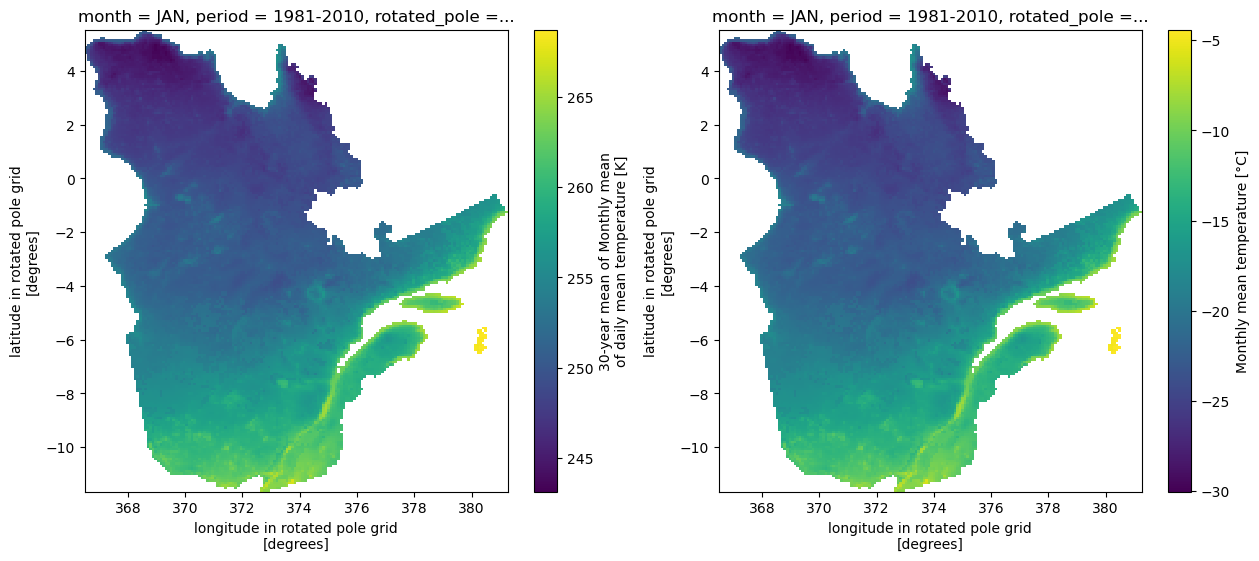

In [46]:
fig, axs = plt.subplots(1,2, figsize=(15, 6))

#ds_dict['GovCan_RDRS_NAM.Quebec.climatology.QS-DEC'].tg_mean.sel(period='1981-2010', season='JJA').plot(ax=axs[0])
#ds_dict['GovCan_RDRS_NAM.Quebec.climatology.fx'].tas_mean_sea.sel(period='1981-2010', season='JJA').plot(ax=axs[1])
ds_dict['GovCan_RDRS_NAM.Quebec.climatology.MS'].tg_mean.sel(period='1981-2010', month='JAN').plot(ax=axs[0])
ds_dict['GovCan_RDRS_NAM.Quebec.climatology.fx'].tas_mean_mon.sel(period='1981-2010', month='JAN').plot(ax=axs[1])

print(sorted([f'{name}' for name in ds_dict['GovCan_RDRS_NAM.Quebec.climatology.fx'].data_vars]))


### Note: Indicators were computed per year/season/month

In [18]:
ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/indicators/ECMWF_ERA5-Land_NAM_MS_indicators.zarr', engine='zarr')
ds

<xarray.Dataset>
Dimensions:  (lat: 179, lon: 230, time: 873)
Coordinates:
  * lat      (lat) float32 44.9 45.0 45.1 45.2 45.3 ... 62.3 62.4 62.5 62.6 62.7
  * lon      (lon) float32 -79.9 -79.8 -79.7 -79.6 ... -57.3 -57.2 -57.1 -57.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-09-01
Data variables:
    tg_mean  (time, lat, lon) float32 ...
    tn_mean  (time, lat, lon) float32 ...
    tx_mean  (time, lat, lon) float32 ...
Attributes: (12/30)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-30 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           mon
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

### Getting some info about the structure of individual files

<xarray.Dataset>
Dimensions:          (lat: 179, lon: 230, month: 12, period: 6, season: 4)
Coordinates:
  * lat              (lat) float32 44.9 45.0 45.1 45.2 ... 62.4 62.5 62.6 62.7
  * lon              (lon) float32 -79.9 -79.8 -79.7 -79.6 ... -57.2 -57.1 -57.0
  * month            (month) <U3 'JAN' 'FEB' 'MAR' 'APR' ... 'OCT' 'NOV' 'DEC'
  * period           (period) <U9 '1951-1980' '1961-1990' ... '1991-2020'
  * season           (season) <U3 'DJF' 'JJA' 'MAM' 'SON'
Data variables: (12/18)
    tas_mean_ann     (period, lat, lon) float32 dask.array<chunksize=(6, 179, 230), meta=np.ndarray>
    tas_mean_mon     (period, month, lat, lon) float32 dask.array<chunksize=(6, 12, 179, 230), meta=np.ndarray>
    tas_mean_sea     (period, season, lat, lon) float32 dask.array<chunksize=(6, 4, 179, 230), meta=np.ndarray>
    tas_std_ann      (period, lat, lon) float32 dask.array<chunksize=(6, 179, 230), meta=np.ndarray>
    tas_std_mon      (period, month, lat, lon) float32 dask.array<chunksize=(6, 12, 179, 230), meta=np.ndarray>
    tas_std_sea      (period, season, lat, lon) float32 dask.array<chunksize=(6, 4, 179, 230), meta=np.ndarray>
    ...               ...
    tasmin_mean_ann  (period, lat, lon) float32 dask.array<chunksize=(6, 179, 230), meta=np.ndarray>
    tasmin_mean_mon  (period, month, lat, lon) float32 dask.array<chunksize=(6, 12, 179, 230), meta=np.ndarray>
    tasmin_mean_sea  (period, season, lat, lon) float32 dask.array<chunksize=(6, 4, 179, 230), meta=np.ndarray>
    tasmin_std_ann   (period, lat, lon) float32 dask.array<chunksize=(6, 179, 230), meta=np.ndarray>
    tasmin_std_mon   (period, month, lat, lon) float32 dask.array<chunksize=(6, 12, 179, 230), meta=np.ndarray>
    tasmin_std_sea   (period, season, lat, lon) float32 dask.array<chunksize=(6, 4, 179, 230), meta=np.ndarray>
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-30 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           fx
    ...                      ...
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction
    cat:variable:            tasmax_std_mon,tas_std_mon,tas_mean_mon,tasmax_s...

tas_mean_ann: ('period', 'lat', 'lon')
tas_mean_ann: []
tas_mean_mon: ('period', 'month', 'lat', 'lon')
tas_mean_mon: ['month']
tas_mean_sea: ('period', 'season', 'lat', 'lon')
tas_mean_sea: ['season']
tas_std_ann: ('period', 'lat', 'lon')
tas_std_ann: []
tas_std_mon: ('period', 'month', 'lat', 'lon')
tas_std_mon: ['month']
tas_std_sea: ('period', 'season', 'lat', 'lon')
tas_std_sea: ['season']
tasmax_mean_ann: ('period', 'lat', 'lon')
tasmax_mean_ann: []
tasmax_mean_mon: ('period', 'month', 'lat', 'lon')
tasmax_mean_mon: ['month']
tasmax_mean_sea: ('period', 'season', 'lat', 'lon')
tasmax_mean_sea: ['season']
tasmax_std_ann: ('period', 'lat', 'lon')
tasmax_std_ann: []
tasmax_std_mon: ('period', 'month', 'lat', 'lon')
tasmax_std_mon: ['month']
tasmax_std_sea: ('period', 'season', 'lat', 'lon')
tasmax_std_sea: ['season']
tasmin_mean_ann: ('period', 'lat', 'lon')
tasmin_mean_ann: []
tasmin_mean_mon: ('period', 'month', 'lat', 'lon')
tasmin_mean_mon: ['month']
tasmin_mean_sea: ('period', 

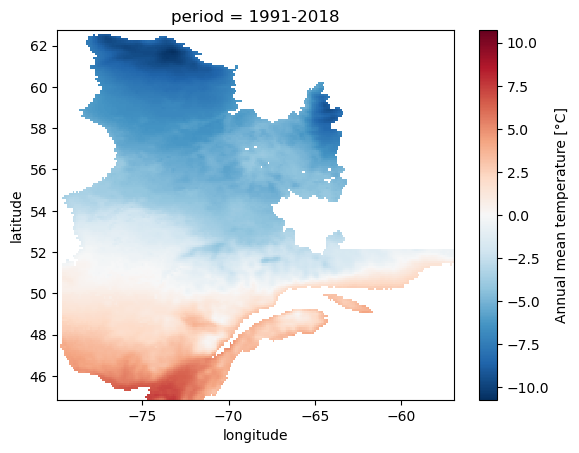

In [7]:
#ds = ds_dict['GovCan_RDRS_NAM.Quebec.climatology.fx']
ds = ds_dict['ECMWF_ERA5-Land_NAM.Quebec.climatology.fx']
#ds = ds_dict['GovCan_AHCCD_CAN_fx_climatology.zarr']
#ds = ds_dict['MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs.NAM-22.climatology.fx']
#ds = ds_dict['MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs.NAM-22.climatology.QS-DEC']
display(ds)
for ind in ds.data_vars.values():
    print(f'{ind.name}: {ind.dims}')
    sp_dim = [dim for dim in ind.dims if dim not in [v[0] for v in ds.cf.axes.values()] + ['period']]
    print(f'{ind.name}: {sp_dim}')

print([v[0] for v in ds.cf.axes.values()]) #.append('period'))

ds.cf.axes.values()
ds.tas_mean_ann.sel(period='1991-2018').plot(y='lat', x='lon')
#ds.tg_mean.sel(period='1980-1985', season='MAM').plot(y='rlat', x='rlon')


## Making the plots for all stats

In [53]:
# Plot the climatologies
for ds_id, ds_in in ds_dict.items():
    # print(f'{ds_id}: {ds_in.period.values}')
    # print(f'{ds_id}: {list(ds_in.data_vars.keys())}')

    # TODO This is just a fix for now
    if 'MRCC' in ds_id:
        ds_in.attrs['source'] = 'CRCM5-ERAint'
    #if 'MRCC' not in ds_id: continue
    #if 'ECMWF_ERA5-Land_NAM.Quebec.climatology.fx' not in ds_id: continue

    # make a plot for each period in the dataset
    print(f'Doing: {ds_id}')
    #display(ds_in)
    for period in ds_in.period.values:
        for ind in ds_in.data_vars.values():
            # skip doubles and non-desired
            skip = ['tas_mean_ann', 'tas_mean_mon', 'tas_mean_sea', 'tasmax_mean_ann', 'tasmax_mean_mon', 'tasmax_mean_sea', 'tasmin_mean_ann', 'tasmin_mean_mon', 'tasmin_mean_sea', 'tas_std_ann', 'tas_std_mon', 'tas_std_sea',  'tasmax_std_ann', 'tasmax_std_mon', 'tasmax_std_sea', 'tasmin_std_ann', 'tasmin_std_mon', 'tasmin_std_sea', 'tn_days_above_20', 'tn_days_above_20_std'] 
            if ind.name not in skip:
                plot_id = f"{ind.attrs['long_name'].lower()} - {ds_in.attrs['source']} ({period})"
                if '30-year std' in plot_id: plot_id = plot_id.replace('30-year std of ', 'Interannual std of the ')
                if '30-year mean' in plot_id: 
                    plot_id = plot_id.replace('30-year mean of ', '')
                    plot_id = plot_id.replace(plot_id.split(' ')[0], plot_id.split(' ')[0].capitalize() + ' climate')
                print(f'\tPlotting {ind.name}: {plot_id} ...')
                #display(ind)
                # print(f'{ds_id}: {var} \n\t{ds_in[var].attrs["long_name"]}')
    
                # inspect the variable and determine for plotting:
                # tmp_dim = do we plot one (annual), 4 (seasonal) or 12 (monthly) plots?
                tmp_dim = [dim for dim in ind.dims if dim not in ['lat', 'lon', 'rlat', 'rlon', 'period']] #[v[0] for v in ds.cf.axes.values()] + ['period']]
                if not tmp_dim: tmp_dim = [1]
                # select the data for annual and sort for seasonal
                sel_kwargs = {'year': 'ANN'} if tmp_dim[0] == 'year' else {}
                if tmp_dim[0] == 'season': sel_kwargs = {'season': ['DJF', 'MAM', 'JJA', 'SON']} # setting the order here, too!
                if tmp_dim[0] == 'month': sel_kwargs = {'month': ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP','OCT', 'NOV', 'DEC']}
                # how to arrange subplots
                col = {1: None, 'year': None, 'season': 'season', 'month': 'month'}
                col_wrap = {1: None, 'year': None, 'season': 2, 'month': 3}
                # colors to use
                if 'std' in ind.name:
                    cmap = 'afmhot_r'
                    cbar_lim = {1: [0, 5], 'year': [0, 5], 'season': [0, 5], 'month': [0, 5]} #list(range(-30, 31, 3))}
                elif any(s in ind.name for s in ['tg', 'tn', 'tx', 'tas']): 
                    cmap = 'RdBu_r'
                    cbar_lim = {1: [-15, 15], 'year': [-15, 15], 'season': [-30, 30], 'month': [-30, 30]} #list(range(-30, 31, 3))}
                
                # convert from K to degC ToDo: This should happen in the workflow!
                if ind.attrs['units'] == 'K' and 'std' not in ind.name:
                    ind = units.convert_units_to(ind, 'degC')
    
                # make the plot
                print(f'\t{tmp_dim[0]} - {col[tmp_dim[0]]} - {col_wrap[tmp_dim[0]]}')
                frame = ind.sel(period=period, **sel_kwargs).plot.contourf(transform=ccrs.PlateCarree(),
                    x='lon', y='lat',
                    col=col[tmp_dim[0]], col_wrap=col_wrap[tmp_dim[0]],
                    subplot_kws={'projection': ccrs.LambertConformal()},
                    cbar_kwargs={'shrink': 0.9},
                    cmap=cmap, levels=21,
                    vmin=cbar_lim[tmp_dim[0]][0], vmax=cbar_lim[tmp_dim[0]][1],                                                  
                    add_labels=False,
                );
    
                # get the figure object to add a title, coastlines, configure the axes
                if isinstance(frame, xr.plot.facetgrid.FacetGrid): fig = frame.fig
                if isinstance(frame, cartopy.mpl.contour.GeoContourSet): fig = frame.axes.figure
                
                # decorate
                fig.axes[-1].set_ylabel(f'Temperature ({ind.attrs["units"]})')
                if tmp_dim[0] in {'month', 'season'}:
                    for ax, title in zip(frame.axes.flat, sel_kwargs[tmp_dim[0]]):
                        ax.set_title(title)
                        
                fig.suptitle(plot_id, y=1.03, wrap=True);
    
                for ax in fig.axes:
                    #print(f'{ax} which is a {type(ax)}')
                    if isinstance(ax, cartopy.mpl.geoaxes.GeoAxes):
                        ax.coastlines()
                        ax.margins(0)
                        # TODO This is just a fix for CRCM5-ERAint
                        if 'MRCC' in ds_id:
                            ax.set_extent([-150, -40, 24, 70], crs=ccrs.PlateCarree())
                        else:
                            ax.set_extent([-79, -60, 45, 61], crs=ccrs.PlateCarree())
    
                # save the figure and close it
                out_dir = Path('/scen3/braun/data/obs_synthese23/image') / period
                if not out_dir.exists(): out_dir.mkdir(parents=True, exist_ok=True)
                file_name = plot_id.replace(' ', '_').replace('(', '').replace(')', '').replace('-_', '')
                fig.savefig(f"{out_dir}/{file_name}.png".replace(' ', '_'), bbox_inches='tight', dpi=300)
                #display(fig)
                plt.close(fig)

print('All Done!')

Doing: ECMWF_ERA5-Land_NAM.Quebec.climatology.AS-JAN
	Plotting tg_mean: Annual climate mean of daily mean temperature - ERA5-Land (1951-1980) ...
	year - None - None
	Plotting tg_mean_std: Interannual std of the annual mean of daily mean temperature - ERA5-Land (1951-1980) ...
	year - None - None
	Plotting tn_mean: Annual climate mean of daily minimum temperature - ERA5-Land (1951-1980) ...
	year - None - None
	Plotting tn_mean_std: Interannual std of the annual mean of daily minimum temperature - ERA5-Land (1951-1980) ...
	year - None - None
	Plotting tx_mean: Annual climate mean of daily maximum temperature - ERA5-Land (1951-1980) ...
	year - None - None
	Plotting tx_mean_std: Interannual std of the annual mean of daily maximum temperature - ERA5-Land (1951-1980) ...
	year - None - None
	Plotting tg_mean: Annual climate mean of daily mean temperature - ERA5-Land (1961-1990) ...
	year - None - None
	Plotting tg_mean_std: Interannual std of the annual mean of daily mean temperature - E

/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the monthly mean of daily mean temperature - ERA5-Land (1951-1980) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Monthly climate mean of daily minimum temperature - ERA5-Land (1951-1980) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the monthly mean of daily minimum temperature - ERA5-Land (1951-1980) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Monthly climate mean of daily maximum temperature - ERA5-Land (1951-1980) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the monthly mean of daily maximum temperature - ERA5-Land (1951-1980) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean: Monthly climate mean of daily mean temperature - ERA5-Land (1961-1990) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the monthly mean of daily mean temperature - ERA5-Land (1961-1990) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Monthly climate mean of daily minimum temperature - ERA5-Land (1961-1990) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the monthly mean of daily minimum temperature - ERA5-Land (1961-1990) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Monthly climate mean of daily maximum temperature - ERA5-Land (1961-1990) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the monthly mean of daily maximum temperature - ERA5-Land (1961-1990) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean: Monthly climate mean of daily mean temperature - ERA5-Land (1971-2000) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the monthly mean of daily mean temperature - ERA5-Land (1971-2000) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Monthly climate mean of daily minimum temperature - ERA5-Land (1971-2000) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the monthly mean of daily minimum temperature - ERA5-Land (1971-2000) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Monthly climate mean of daily maximum temperature - ERA5-Land (1971-2000) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the monthly mean of daily maximum temperature - ERA5-Land (1971-2000) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean: Monthly climate mean of daily mean temperature - ERA5-Land (1981-2010) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the monthly mean of daily mean temperature - ERA5-Land (1981-2010) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Monthly climate mean of daily minimum temperature - ERA5-Land (1981-2010) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the monthly mean of daily minimum temperature - ERA5-Land (1981-2010) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Monthly climate mean of daily maximum temperature - ERA5-Land (1981-2010) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the monthly mean of daily maximum temperature - ERA5-Land (1981-2010) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean: Monthly climate mean of daily mean temperature - ERA5-Land (1991-2018) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the monthly mean of daily mean temperature - ERA5-Land (1991-2018) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Monthly climate mean of daily minimum temperature - ERA5-Land (1991-2018) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the monthly mean of daily minimum temperature - ERA5-Land (1991-2018) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Monthly climate mean of daily maximum temperature - ERA5-Land (1991-2018) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the monthly mean of daily maximum temperature - ERA5-Land (1991-2018) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean: Monthly climate mean of daily mean temperature - ERA5-Land (1991-2020) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the monthly mean of daily mean temperature - ERA5-Land (1991-2020) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Monthly climate mean of daily minimum temperature - ERA5-Land (1991-2020) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the monthly mean of daily minimum temperature - ERA5-Land (1991-2020) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Monthly climate mean of daily maximum temperature - ERA5-Land (1991-2020) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the monthly mean of daily maximum temperature - ERA5-Land (1991-2020) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


Doing: ECMWF_ERA5-Land_NAM.Quebec.climatology.QS-DEC
	Plotting tg_mean: Seasonal climate mean of daily mean temperature - ERA5-Land (1951-1980) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the seasonal mean of daily mean temperature - ERA5-Land (1951-1980) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Seasonal climate mean of daily minimum temperature - ERA5-Land (1951-1980) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the seasonal mean of daily minimum temperature - ERA5-Land (1951-1980) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Seasonal climate mean of daily maximum temperature - ERA5-Land (1951-1980) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the seasonal mean of daily maximum temperature - ERA5-Land (1951-1980) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean: Seasonal climate mean of daily mean temperature - ERA5-Land (1961-1990) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the seasonal mean of daily mean temperature - ERA5-Land (1961-1990) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Seasonal climate mean of daily minimum temperature - ERA5-Land (1961-1990) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the seasonal mean of daily minimum temperature - ERA5-Land (1961-1990) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Seasonal climate mean of daily maximum temperature - ERA5-Land (1961-1990) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the seasonal mean of daily maximum temperature - ERA5-Land (1961-1990) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean: Seasonal climate mean of daily mean temperature - ERA5-Land (1971-2000) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the seasonal mean of daily mean temperature - ERA5-Land (1971-2000) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Seasonal climate mean of daily minimum temperature - ERA5-Land (1971-2000) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the seasonal mean of daily minimum temperature - ERA5-Land (1971-2000) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Seasonal climate mean of daily maximum temperature - ERA5-Land (1971-2000) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the seasonal mean of daily maximum temperature - ERA5-Land (1971-2000) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean: Seasonal climate mean of daily mean temperature - ERA5-Land (1981-2010) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the seasonal mean of daily mean temperature - ERA5-Land (1981-2010) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Seasonal climate mean of daily minimum temperature - ERA5-Land (1981-2010) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the seasonal mean of daily minimum temperature - ERA5-Land (1981-2010) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Seasonal climate mean of daily maximum temperature - ERA5-Land (1981-2010) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the seasonal mean of daily maximum temperature - ERA5-Land (1981-2010) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean: Seasonal climate mean of daily mean temperature - ERA5-Land (1991-2018) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the seasonal mean of daily mean temperature - ERA5-Land (1991-2018) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Seasonal climate mean of daily minimum temperature - ERA5-Land (1991-2018) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the seasonal mean of daily minimum temperature - ERA5-Land (1991-2018) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Seasonal climate mean of daily maximum temperature - ERA5-Land (1991-2018) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the seasonal mean of daily maximum temperature - ERA5-Land (1991-2018) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean: Seasonal climate mean of daily mean temperature - ERA5-Land (1991-2020) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the seasonal mean of daily mean temperature - ERA5-Land (1991-2020) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Seasonal climate mean of daily minimum temperature - ERA5-Land (1991-2020) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the seasonal mean of daily minimum temperature - ERA5-Land (1991-2020) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Seasonal climate mean of daily maximum temperature - ERA5-Land (1991-2020) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the seasonal mean of daily maximum temperature - ERA5-Land (1991-2020) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


Doing: ECMWF_ERA5-Land_NAM.Quebec.climatology.fx
Doing: GovCan_RDRS_NAM.Quebec.climatology.AS-JAN
	Plotting tg_mean: Annual climate mean of daily mean temperature - RDRS v2.1 (1981-2010) ...
	year - None - None
	Plotting tg_mean_std: Interannual std of the annual mean of daily mean temperature - RDRS v2.1 (1981-2010) ...
	year - None - None
	Plotting tn_mean: Annual climate mean of daily minimum temperature - RDRS v2.1 (1981-2010) ...
	year - None - None
	Plotting tn_mean_std: Interannual std of the annual mean of daily minimum temperature - RDRS v2.1 (1981-2010) ...
	year - None - None
	Plotting tx_mean: Annual climate mean of daily maximum temperature - RDRS v2.1 (1981-2010) ...
	year - None - None
	Plotting tx_mean_std: Interannual std of the annual mean of daily maximum temperature - RDRS v2.1 (1981-2010) ...
	year - None - None
	Plotting tg_mean: Annual climate mean of daily mean temperature - RDRS v2.1 (1991-2018) ...
	year - None - None
	Plotting tg_mean_std: Interannual std of 

/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the monthly mean of daily mean temperature - RDRS v2.1 (1981-2010) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Monthly climate mean of daily minimum temperature - RDRS v2.1 (1981-2010) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the monthly mean of daily minimum temperature - RDRS v2.1 (1981-2010) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Monthly climate mean of daily maximum temperature - RDRS v2.1 (1981-2010) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the monthly mean of daily maximum temperature - RDRS v2.1 (1981-2010) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean: Monthly climate mean of daily mean temperature - RDRS v2.1 (1991-2018) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the monthly mean of daily mean temperature - RDRS v2.1 (1991-2018) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Monthly climate mean of daily minimum temperature - RDRS v2.1 (1991-2018) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the monthly mean of daily minimum temperature - RDRS v2.1 (1991-2018) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Monthly climate mean of daily maximum temperature - RDRS v2.1 (1991-2018) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the monthly mean of daily maximum temperature - RDRS v2.1 (1991-2018) ...
	month - month - 3


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


Doing: GovCan_RDRS_NAM.Quebec.climatology.QS-DEC
	Plotting tg_mean: Seasonal climate mean of daily mean temperature - RDRS v2.1 (1981-2010) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the seasonal mean of daily mean temperature - RDRS v2.1 (1981-2010) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Seasonal climate mean of daily minimum temperature - RDRS v2.1 (1981-2010) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the seasonal mean of daily minimum temperature - RDRS v2.1 (1981-2010) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Seasonal climate mean of daily maximum temperature - RDRS v2.1 (1981-2010) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the seasonal mean of daily maximum temperature - RDRS v2.1 (1981-2010) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean: Seasonal climate mean of daily mean temperature - RDRS v2.1 (1991-2018) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: Interannual std of the seasonal mean of daily mean temperature - RDRS v2.1 (1991-2018) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean: Seasonal climate mean of daily minimum temperature - RDRS v2.1 (1991-2018) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tn_mean_std: Interannual std of the seasonal mean of daily minimum temperature - RDRS v2.1 (1991-2018) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean: Seasonal climate mean of daily maximum temperature - RDRS v2.1 (1991-2018) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tx_mean_std: Interannual std of the seasonal mean of daily maximum temperature - RDRS v2.1 (1991-2018) ...
	season - season - 2


/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


Doing: GovCan_RDRS_NAM.Quebec.climatology.fx
Doing: MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs.NAM-22.climatology.AS-JAN
	Plotting tg_mean: 6-year mean of annual mean of daily mean temperature - CRCM5-ERAint (1980-1985) ...
	year - None - None


/exec/braun/.conda/envs/obsflow/lib/python3.9/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
/exec/braun/.conda/envs/obsflow/lib/python3.9/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.


	Plotting tg_mean_std: 6-year std of annual mean of daily mean temperature - CRCM5-ERAint (1980-1985) ...
	year - None - None
Doing: MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs.NAM-22.climatology.MS
	Plotting tg_mean: 6-year mean of monthly mean of daily mean temperature - CRCM5-ERAint (1980-1985) ...
	month - month - 3


/exec/braun/.conda/envs/obsflow/lib/python3.9/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
/exec/braun/.conda/envs/obsflow/lib/python3.9/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: 6-year std of monthly mean of daily mean temperature - CRCM5-ERAint (1980-1985) ...
	month - month - 3


/exec/braun/.conda/envs/obsflow/lib/python3.9/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
/exec/braun/.conda/envs/obsflow/lib/python3.9/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


Doing: MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs.NAM-22.climatology.QS-DEC
	Plotting tg_mean: 6-year mean of seasonal mean of daily mean temperature - CRCM5-ERAint (1980-1985) ...
	season - season - 2


/exec/braun/.conda/envs/obsflow/lib/python3.9/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
/exec/braun/.conda/envs/obsflow/lib/python3.9/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


	Plotting tg_mean_std: 6-year std of seasonal mean of daily mean temperature - CRCM5-ERAint (1980-1985) ...
	season - season - 2


/exec/braun/.conda/envs/obsflow/lib/python3.9/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
/exec/braun/.conda/envs/obsflow/lib/python3.9/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
/tmp/ipykernel_732/2937503145.py:71: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.


Doing: MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs.NAM-22.climatology.fx
All Done!


In [49]:
import numpy as np
l = list(np.arange(.5, 3.2, .15))
print(l)
print(len(l))


[0.5, 0.65, 0.8, 0.9500000000000001, 1.1, 1.25, 1.4000000000000001, 1.5500000000000003, 1.7000000000000002, 1.85, 2.0, 2.1500000000000004, 2.3000000000000003, 2.45, 2.6000000000000005, 2.7500000000000004, 2.9000000000000004, 3.0500000000000003, 3.2]
19


In [50]:
cbar_lim = {1: [-16, 16], 'year': [-16, 16], 'season': [-32, 32], 'month': [-32, 32]} #list(range(-30, 31, 3))}
cbar_lim['season'][1]

32

In [28]:
plot_id = f"{ind.attrs['long_name'].lower()} - {ds_in.attrs['source']} ({period})"
#plot_id = "30-year_mean_of_monthly_mean_of_daily_maximum_temperature_ERA5-Land_1951-1980".replace('_', ' ')
if '30-year std' in plot_id: plot_id = plot_id.replace('30-year std of ', 'Interannual std of the ')
if '30-year mean' in plot_id: 
    plot_id = plot_id.replace('30-year mean of ', '')
    plot_id = plot_id.replace(plot_id.split(' ')[0], plot_id.split(' ')[0].capitalize() + ' climate')

print(plot_id)
print(plot_id.replace(' ', '_').replace('(', '').replace(')', '').replace('-_', ''))

Interannual std of the annual mean of daily minimum temperature - ERA5-Land (1951-1980)
Interannual_std_of_the_annual_mean_of_daily_minimum_temperature_ERA5-Land_1951-1980


In [4]:
ind

<xarray.DataArray 'tn_mean' (period: 6, month: 12, lat: 179, lon: 230)>
dask.array<truediv, shape=(6, 12, 179, 230), dtype=float32, chunksize=(6, 12, 30, 30), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 44.9 45.0 45.1 45.2 45.3 ... 62.3 62.4 62.5 62.6 62.7
  * lon      (lon) float32 -79.9 -79.8 -79.7 -79.6 ... -57.3 -57.2 -57.1 -57.0
  * month    (month) <U3 'JAN' 'FEB' 'MAR' 'APR' ... 'SEP' 'OCT' 'NOV' 'DEC'
  * period   (period) <U9 '1951-1980' '1961-1990' ... '1991-2018' '1991-2020'
Attributes:
    cell_methods:   time: point time: mean over days
    description:    30-year mean of Monthly mean of daily minimum temperature.
    history:        [2023-08-03 22:52:03] 30-year rolling average (non-center...
    long_name:      30-year mean of Monthly mean of daily minimum temperature
    standard_name:  air_temperature
    units:          °C

In [115]:
import datetime

print([datetime.date(2000, m, 1).strftime('%^b') for m in range(1, 13)])

['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']


### testing some aggregation (should go to Testing_reference_sim_bcs.ipynb)

In [8]:
import xarray as xr
from dask.distributed import Client
#import hvplot.xarray

ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/extracted/ECMWF_ERA5-Land_NAM_D_extracted.zarr', engine='zarr')
ds

<xarray.Dataset>
Dimensions:  (lat: 179, lon: 230, time: 26571)
Coordinates:
  * lat      (lat) float32 44.9 45.0 45.1 45.2 45.3 ... 62.3 62.4 62.5 62.6 62.7
  * lon      (lon) float32 -79.9 -79.8 -79.7 -79.6 ... -57.3 -57.2 -57.1 -57.0
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2022-09-30
Data variables:
    crs      int64 ...
    pr       (time, lat, lon) float32 ...
    tas      (time, lat, lon) float32 ...
    tasmax   (time, lat, lon) float32 ...
    tasmin   (time, lat, lon) float32 ...
Attributes: (12/27)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  ECMWF_ERA5-Land_NAM
    cat:institution:         ECMWF
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

In [11]:
with Client(n_workers=4, threads_per_worker=2, memory_limit='10GB'):
    ds_mon = ds.chunk({'time': 300}).resample(time='1MS').mean()
ds_mon

/exec/braun/.conda/envs/obsflow/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43971 instead
  warnings.warn(
2023-08-08 21:20:37,801 - distributed.nanny - ERROR - Failed to start process
Traceback (most recent call last):
  File "/exec/braun/.conda/envs/obsflow/lib/python3.9/site-packages/distributed/nanny.py", line 432, in instantiate
    result = await self.process.start()
  File "/exec/braun/.conda/envs/obsflow/lib/python3.9/site-packages/distributed/nanny.py", line 691, in start
    self.init_result_q = init_q = get_mp_context().Queue()
  File "/exec/braun/.conda/envs/obsflow/lib/python3.9/multiprocessing/context.py", line 103, in Queue
    return Queue(maxsize, ctx=self.get_context())
  File "/exec/braun/.conda/envs/obsflow/lib/python3.9/multiprocessing/queues.py", line 43, in __init__
    self._rlock = ctx.Lock()
  File "/exec/braun/.conda/envs/obsflow/lib/

OSError: [Errno 12] Cannot allocate memory

In [2]:
import xarray as xr
from pathlib import Path
expl_dir = Path('/expl6/climato/diagclim/bcs/1980_1985/tas/')
ds_h = xr.open_dataset(expl_dir / f'tas_bcs_01_1980_1985_stdintra.nc')
ds_h

<xarray.Dataset>
Dimensions:             (time: 1, rlat: 300, rlon: 340, bnds: 2, height: 1,
                         ts: 6)
Coordinates:
  * height              (height) float64 2.0
    lat                 (rlat, rlon) float64 ...
    lon                 (rlat, rlon) float64 ...
  * rlat                (rlat) float64 -30.71 -30.49 -30.27 ... 34.85 35.07
  * rlon                (rlon) float64 -33.99 -33.77 -33.55 ... 40.37 40.59
  * time                (time) datetime64[ns] 1982-07-02T12:00:00
Dimensions without coordinates: bnds, ts
Data variables:
    tas                 (time, rlat, rlon) float64 ...
    climatology_bounds  (time, bnds) datetime64[ns] ...
    poids               (time) float32 ...
    rotated_pole        |S1 ...
    time_vectors        (time, ts) float32 ...
Attributes:
    history_of_appended_files:  Thu Jul 18 19:00:37 2019: Appended file /exec...
    nco_openmp_thread_number:   1
    history:                    Thu Jul 18 19:00:37 2019: ncatted -a long_nam...
    NCO:                        4.6.7